## 배치 경사 하강법 (Batch Gradient Descent)

배치 경사 하강법은 손실 함수의 최솟값을 찾기 위해 사용되는 기본적인 최적화 알고리즘이다. 이름의 '배치(Batch)'가 의미하듯, **전체 훈련 데이터셋(하나의 배치)** 을 사용하여 손실 함수의 기울기(gradient)를 한 번에 계산한다. 이 기울기를 이용해 모델 파라미터를 최적점 방향으로 점진적으로 업데이트한다.

### 기본 설정
예시에 필요한 `numpy`와 `matplotlib` 라이브러리를 임포트.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### 예시 데이터 준비
다른 옵티마이저 예제와 동일하게, 선형 관계(`y = 2x + 1`)를 갖는 데이터를 생성.

In [7]:
# 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1) # y = 1 + 2x + noise

# 데이터 확인 (첫 5개)
print("X (입력) 샘플:\n", X[:5])
print("y (정답) 샘플:\n", y[:5])

X (입력) 샘플:
 [[1.26358421]
 [0.84546049]
 [0.71050979]
 [0.91102912]
 [1.07571563]]
y (정답) 샘플:
 [[3.33159197]
 [2.87236671]
 [2.65206908]
 [1.75781005]
 [2.56435133]]


### 경사 하강법 구현 및 모델 학습

배치 경사 하강법 알고리즘을 직접 구현하여 모델의 최적 파라미터를 찾아가는 과정.

1. `w`와 `b`를 임의의 값으로 초기화.
2. 각 epoch마다 **전체 데이터셋**에 대한 예측값을 계산.
3. 전체 예측값과 실제값의 오차를 바탕으로 기울기를 **한 번에** 계산.
4. 계산된 기울기와 학습률을 사용하여 `w`와 `b`를 업데이트.
5. 이 과정을 모든 epoch 동안 반복. (SGD와 달리 데이터 순서를 섞을 필요 없음)

In [8]:
# 하이퍼파라미터 설정
learning_rate = 0.1 # SGD보다 큰 학습률 사용 가능
n_epochs = 100

# 모델 파라미터(가중치, 편향) 초기화
w = np.random.randn(1, 1)
b = np.random.randn(1, 1)

# 데이터 개수
m = len(X)

print(f"초기 가중치 w: {w[0][0]:.4f}, 초기 편향 b: {b[0][0]:.4f}")

# 학습 과정
for epoch in range(n_epochs):
    # 1. 전체 데이터에 대한 예측 계산
    y_pred = np.dot(X, w) + b
    
    # 2. 전체 데이터에 대한 오차 계산
    error = y_pred - y
    
    # 3. 전체 데이터에 대한 기울기 계산
    # 손실 함수(MSE)를 w, b에 대해 각각 편미분한 결과
    # (1/m)을 곱해 평균 기울기를 사용
    gradient_w = (2/m) * np.dot(X.T, error)
    gradient_b = (2/m) * np.sum(error)
    
    # 4. 파라미터 업데이트
    w = w - learning_rate * gradient_w
    b = b - learning_rate * gradient_b
        
    if (epoch + 1) % 10 == 0:
        # 전체 데이터에 대한 손실(MSE) 계산
        loss = np.mean(error**2)
        print(f"Epoch {epoch+1:3d}: Loss = {loss:.4f}, w = {w[0][0]:.4f}, b = {b[0][0]:.4f}")

초기 가중치 w: -0.0433, 초기 편향 b: -0.3443
Epoch  10: Loss = 0.8956, w = 1.8726, b = 1.0396
Epoch  20: Loss = 0.8790, w = 1.9577, b = 0.9493
Epoch  30: Loss = 0.8704, w = 2.0154, b = 0.8806
Epoch  40: Loss = 0.8660, w = 2.0572, b = 0.8309
Epoch  50: Loss = 0.8636, w = 2.0874, b = 0.7948
Epoch  60: Loss = 0.8624, w = 2.1093, b = 0.7687
Epoch  70: Loss = 0.8618, w = 2.1252, b = 0.7498
Epoch  80: Loss = 0.8614, w = 2.1366, b = 0.7361
Epoch  90: Loss = 0.8612, w = 2.1450, b = 0.7262
Epoch 100: Loss = 0.8611, w = 2.1510, b = 0.7190


### 학습 결과 확인

학습이 완료된 후의 최종 `w`와 `b`를 확인하여 실제 값(`w=2`, `b=1`)에 근사하는지 비교. 손실 값이 안정적으로 감소하는 것을 확인 가능.

In [9]:
print("===== 학습 완료 ====")
print(f"최종 가중치 w: {w[0][0]:.4f}")
print(f"최종 편향 b: {b[0][0]:.4f}")
print("실제 값: w=2, b=1")

===== 학습 완료 ====
최종 가중치 w: 2.1510
최종 편향 b: 0.7190
실제 값: w=2, b=1


### 학습된 모델 시각화

원본 데이터와 경사 하강법으로 학습된 선형 회귀 직선을 함께 시각화.

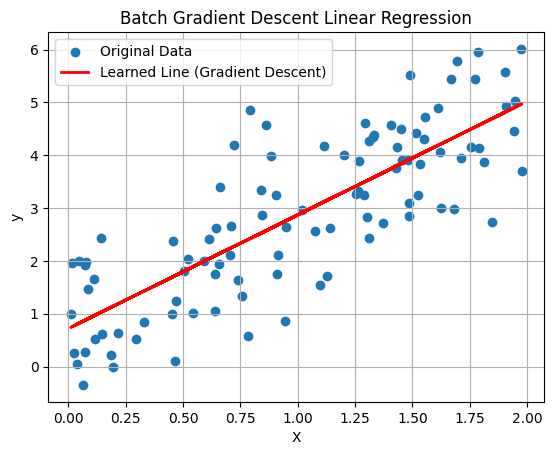

In [10]:
# 산점도로 원본 데이터 시각화
plt.scatter(X, y, label='Original Data')

# 학습된 선형 회귀선 시각화
y_pred_line = w * X + b
plt.plot(X, y_pred_line, color='red', linewidth=2, label='Learned Line (Gradient Descent)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Batch Gradient Descent Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

### 특징 및 SGD와의 비교

- **장점**: 
  - **안정적인 수렴**: 전체 데이터의 평균 기울기를 사용하므로 파라미터 업데이트 경로가 매우 부드럽고 안정적이다.
  - **수렴 보장**: 손실 함수가 볼록 함수(convex function)일 경우, 전역 최솟값(global minimum)으로의 수렴을 보장한다.

- **단점**:
  - **계산 비용**: 매 업데이트마다 **전체 데이터셋**을 메모리에 올리고 계산해야 하므로, 데이터가 매우 클 경우 계산 비용이 엄청나게 커지고 속도가 느리다.
  - **지역 최솟값**: 손실 함수가 복잡할 경우, 전역 최솟값이 아닌 지역 최솟값(local minimum)에 수렴하여 갇힐 수 있다.

| 구분 | 배치 경사 하강법 (Batch GD) | 확률적 경사 하강법 (SGD) |
|---|---|---|
| **업데이트 당 데이터 사용량** | 전체 데이터셋 | 1개의 랜덤 샘플 |
| **업데이트 경로** | 부드럽고 안정적 | 불안정하고 지그재그 |
| **계산 속도 (1 epoch)** | 매우 느림 | 매우 빠름 |
| **메모리 사용량** | 매우 큼 | 매우 작음 |
| **수렴 안정성** | 높음 | 낮음 (진동) |

### 한 문장 요약

배치 경사 하강법은 전체 데이터셋의 평균 기울기를 사용하여 가장 안정적인 경로로 파라미터를 업데이트하는 최적화 알고리즘이다.